In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# To replicate the results
np.random.seed(20000606)

# Some hyperparameters too play with
N_COMPARISONS = 10
N_EXPERIMENTS = 100

# Sample p-values
# As we assume that null hypothesis is true, 
# the p-value would be distributed uniformly
sample = np.random.uniform(0, 1, size=(N_COMPARISONS, N_EXPERIMENTS))

# Probability of type I error we are ready to accept
# Probabiltiy of rejecting null hypothesis when it is actually true
alpha = 0.05

In [3]:
# Theoretical False Positive Rate
# 
# 1.
# Probability that we cocnlude a significant difference for a given comparison
# is equal to alpha by definition in our setting of true null hypothesis
# Then [(1 - alpha)] is the probability of not rejecting the null hypothesis
#
# 2.
# As experiments are considered independent, the probability of not rejecting 
# the null hypothesis in [(1 - alpha)]^N
#
# 3.
# Probability that at least one is a false positive is equal to
# 1 - (probability from 2.)

prob_at_least_one_false_positive = 1 - ((1 - alpha) ** N_COMPARISONS)

# Observed False Positive Rate
# We conclude that experiment is a false positive when p-value is less than alpha
false_positives_cnt = np.sum(np.sum(sample <= alpha, axis=0) > 0)
false_positives_share = false_positives_cnt / N_EXPERIMENTS

# Bonferroni correction
bonferroni_alpha = alpha / N_COMPARISONS
bonferroni_false_positive_comparisons_cnt = np.sum(np.sum(sample <= bonferroni_alpha, axis=0) > 0)
bonferroni_false_positive_comparisons_share = bonferroni_false_positive_comparisons_cnt / N_EXPERIMENTS

print(f'Theoretical False Positive Rate Without Correction: {prob_at_least_one_false_positive:0.4f}')
print(f'Observed False Positive Rate Without Correction: {false_positives_share:0.4f} ({false_positives_cnt:0.0f} out of {N_EXPERIMENTS})')
print(f'Observed False Positive Rate With Bonferroni Correction: {bonferroni_false_positive_comparisons_share:0.4f} ({bonferroni_false_positive_comparisons_cnt:0.0f} out of {N_EXPERIMENTS})')

Theoretical False Positive Rate Without Correction: 0.4013
Observed False Positive Rate Without Correction: 0.4200 (42 out of 100)
Observed False Positive Rate With Bonferroni Correction: 0.0300 (3 out of 100)


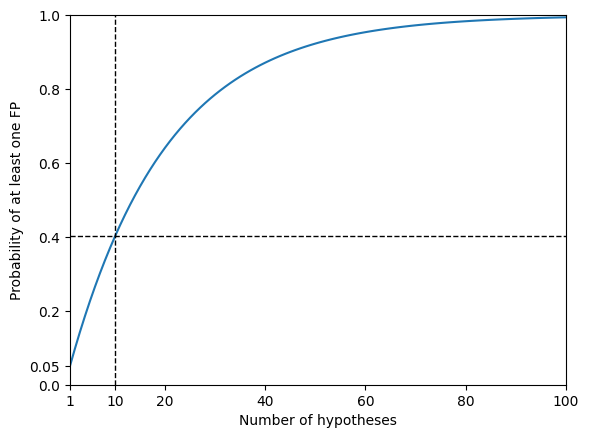

In [4]:
num_hypo = range(1, 101, 1)
probs = [1 - (1 - alpha)**i for i in num_hypo]
corr_probs = [1 - (1 - alpha/i)**i for i in num_hypo]

plt.plot(num_hypo, probs)

plt.xlabel('Number of hypotheses')
plt.ylabel('Probability of at least one FP')

plt.axvline(10, color='black', ls='--', lw=1)
plt.axhline(probs[10-1], color='black', ls='--', lw=1)

plt.xticks(np.concatenate([plt.xticks()[0], [1, 10]]),
           np.concatenate([plt.xticks()[1], [1, 10]]))

plt.yticks(np.concatenate([plt.yticks()[0], [0.05]]),
           np.concatenate([plt.yticks()[1], [0.05]]))

plt.ylim(0, 1)
plt.xlim(1, 100)

plt.savefig('./theor_fp_prob_naive.png', bbox_inches='tight', dpi=100)
plt.show()

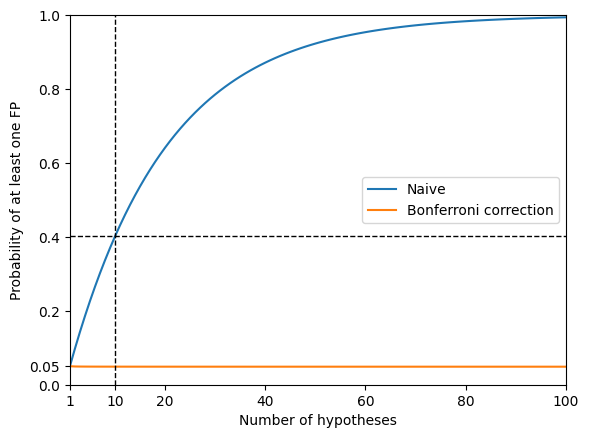

In [5]:
corr_probs = [1 - (1 - alpha/i)**i for i in num_hypo]

plt.plot(num_hypo, probs, label='Naive')
plt.plot(num_hypo, corr_probs, label='Bonferroni correction')

plt.xlabel('Number of hypotheses')
plt.ylabel('Probability of at least one FP')

plt.axvline(10, color='black', ls='--', lw=1)
plt.axhline(probs[10-1], color='black', ls='--', lw=1)

plt.xticks(np.concatenate([plt.xticks()[0], [1, 10]]),
           np.concatenate([plt.xticks()[1], [1, 10]]))

plt.yticks(np.concatenate([plt.yticks()[0], [0.05]]),
           np.concatenate([plt.yticks()[1], [0.05]]))

plt.ylim(0, 1)
plt.xlim(1, 100)

plt.legend()

plt.savefig('./theor_fp_prob_bonferroni.png', bbox_inches='tight', dpi=100)
plt.show()

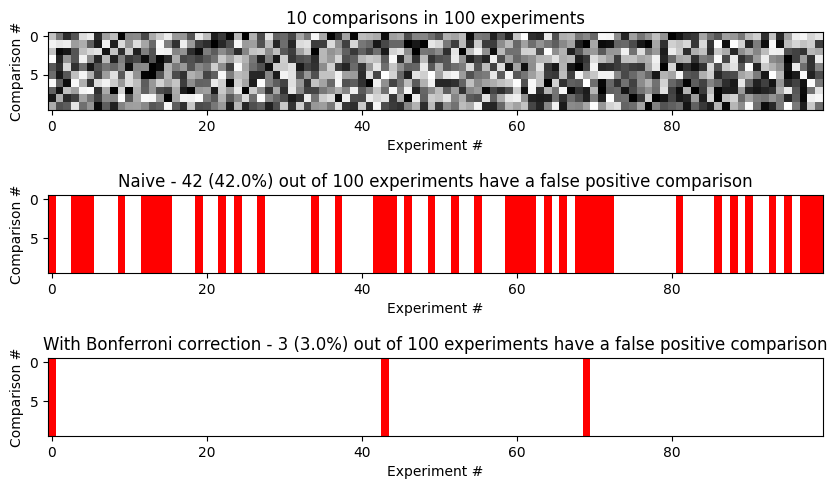

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(10, 6))

img = axes[0].imshow(sample, cmap='binary')
axes[0].set_xlabel('Experiment #')
axes[0].set_ylabel('Comparison #')
axes[0].set_title(f'{N_COMPARISONS} comparisons in {N_EXPERIMENTS} experiments')

axes[1].imshow(
    [np.where(np.sum(sample <= alpha, axis=0) > 0, 1, 0) for _ in range(N_COMPARISONS)], 
    cmap='bwr', 
    alpha=[np.where(np.sum(sample <= alpha, axis=0) > 0, 1.0, 0.0) for _ in range(N_COMPARISONS)])
axes[1].set_xlabel('Experiment #')
axes[1].set_ylabel('Comparison #')
axes[1].set_title(f'Naive - {false_positives_cnt} ({100.0*false_positives_share:0.1f}%) out of {N_EXPERIMENTS} experiments have a false positive comparison')

axes[2].imshow(
    [np.where(np.sum(sample <= bonferroni_alpha, axis=0) > 0, 1, 0) for _ in range(N_COMPARISONS)], 
    cmap='bwr', 
    alpha=[np.where(np.sum(sample <= bonferroni_alpha, axis=0) > 0, 1.0, 0.0) for _ in range(N_COMPARISONS)])
axes[2].set_xlabel('Experiment #')
axes[2].set_ylabel('Comparison #')
axes[2].set_title(f'With Bonferroni correction - {bonferroni_false_positive_comparisons_cnt} ({100.0*bonferroni_false_positive_comparisons_share:0.1f}%) out of {N_EXPERIMENTS} experiments have a false positive comparison')

plt.savefig('./obs_fp.png', bbox_inches='tight', dpi=100)
plt.show()